# Model definition and analysis.

This example shows how to setup and analyze an RT1 model specification with the [rt1 python package](https://github.com/raphaelquast/rt1_model) .

> **NOTE:** to run this example you need the additional dependencies [matplotlib](https://matplotlib.org/) and [ipympl](https://matplotlib.org/ipympl/).

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from rt1_model import RT1, surface, volume, set_loglevel
set_loglevel("debug")

## Define the used volume- and surface-scattering phase function

In [2]:
# Parameterized HenyeyGreenstein function used as volume-scattering phase function
V = volume.HenyeyGreenstein(t="t_v", ncoefs=8)

# Parameterized linear-combination of BRDFs used as surface-scattering phase function
SRF = surface.LinComb(
    [
      ("x", surface.HG_nadirnorm(t="t_s", ncoefs=8, a=[1, 1, 1])),
      ("1 - x", surface.HG_nadirnorm(t="-t_s", ncoefs=8, a=[-1, 1, 1]))
    ]
    )

## Visualize distribution functions as polarplots

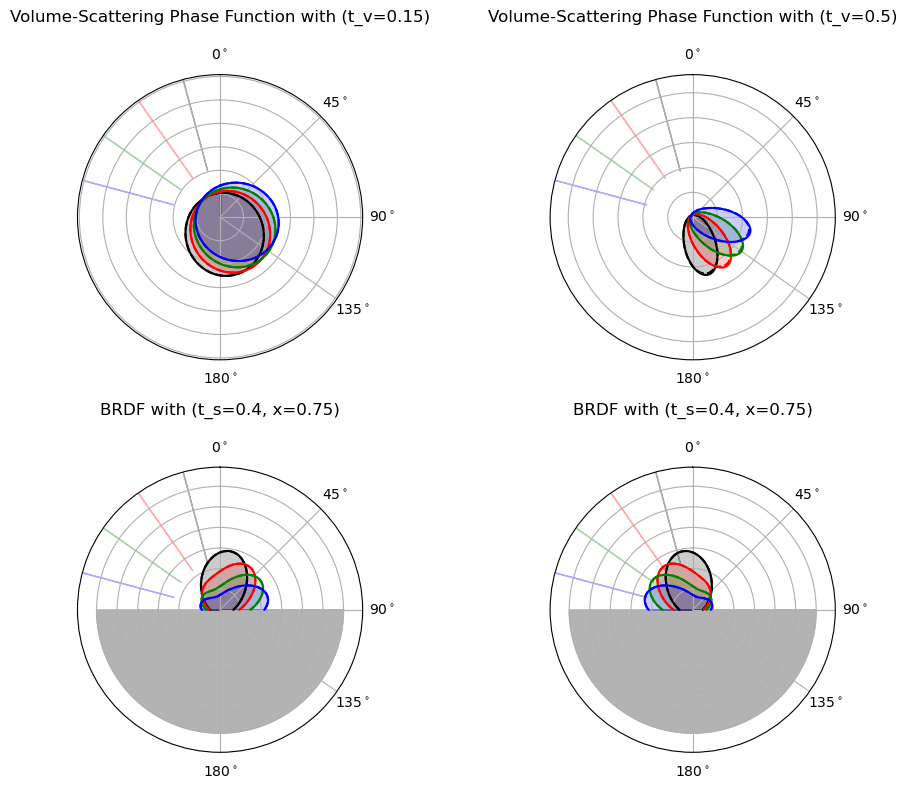

In [3]:
# visualize V and SRF as polarplots
f, axes = plt.subplots(2, 2, figsize=(10, 8), subplot_kw=dict(projection='polar'))
for ax, t_v in zip(axes[0], [0.15, 0.5]):
    V.polarplot(param_dict=dict(t_v=t_v), polarax=ax, legend=False, label=f"Volume-Scattering Phase Function with (t_v={t_v})")
for ax, x, t_s in zip(axes[1], [0.75, 0.25], [0.4, 0.4]):
    SRF.polarplot(param_dict=dict(x=x, t_s=t_s), legend=False, groundcolor=".7", polarax=ax, label=f"BRDF with (t_s={t_s}, x=0.75)")
f.tight_layout()
plt.show()

## Plot the incidence-angle dependency of the hemispherical reflectance of the BRDF

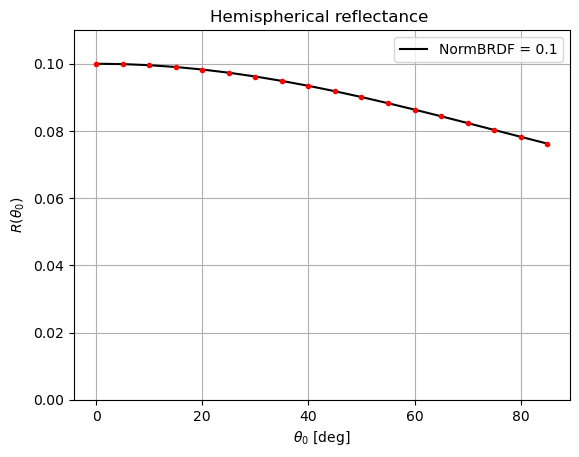

In [4]:
# check incidence-angle dependency of hemispherical reflectance of the surface BRDF
SRF.hemreflect(param_dict=dict(t_s=0.15, x=0.5, NormBRDF=0.1))

## Setup RT1 model and analyze resulting backscattering coefficient

In [5]:
# Setup RT1 model
R = RT1(V=V, SRF=SRF, int_Q=True, sig0=True, dB=True)

### Analyze monostatic backscattering coefficient

14:38:08.161 DEBUG: Generation of fnevals functions...


14:38:08.163 INFO: Evaluating coefficients for interaction-term...


14:38:09.177 DEBUG: Expansion calculated, it took 1.0128242999999983 sec.


14:38:09.876 INFO: Coefficients extracted, it took 0.69821 sec.


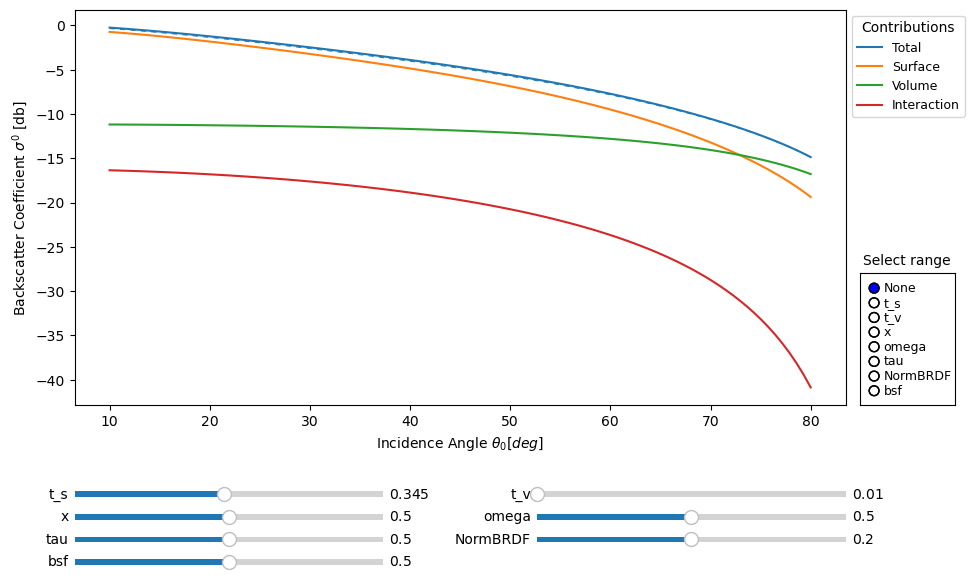

In [6]:
R.dB = True # Create monostatic plots in dB

# setup parameter ranges to analyze
param_dict=dict(t_s=(0.01, .7),
                t_v=(0.01, .7, 0.01),
                x=(0, 1),
                omega=(0,1),
                tau=(0,1),
                NormBRDF=(0, .4),
                bsf=(0, 1),
                )

a1 = R.analyze(param_dict=param_dict)

### Analyze 3D scattering distribution

14:38:11.333 WARNING: The analyze-plot shows results for 'fvfv' geometry!


14:38:11.552 DEBUG: Generation of fnevals functions...


14:38:11.553 INFO: Evaluating coefficients for interaction-term...


14:38:14.200 DEBUG: Expansion calculated, it took 2.6469794999999987 sec.


14:38:15.756 INFO: Coefficients extracted, it took 1.55508 sec.


D:\python_modules\RT1_new\src\rt1_model\_calc.py:1194: RuntimeWarning: divide by zero encountered in divide
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))
D:\python_modules\RT1_new\src\rt1_model\_calc.py:1194: RuntimeWarning: invalid value encountered in add
  np.exp(-tau / mu) * np.log(mu / (1.0 - mu))


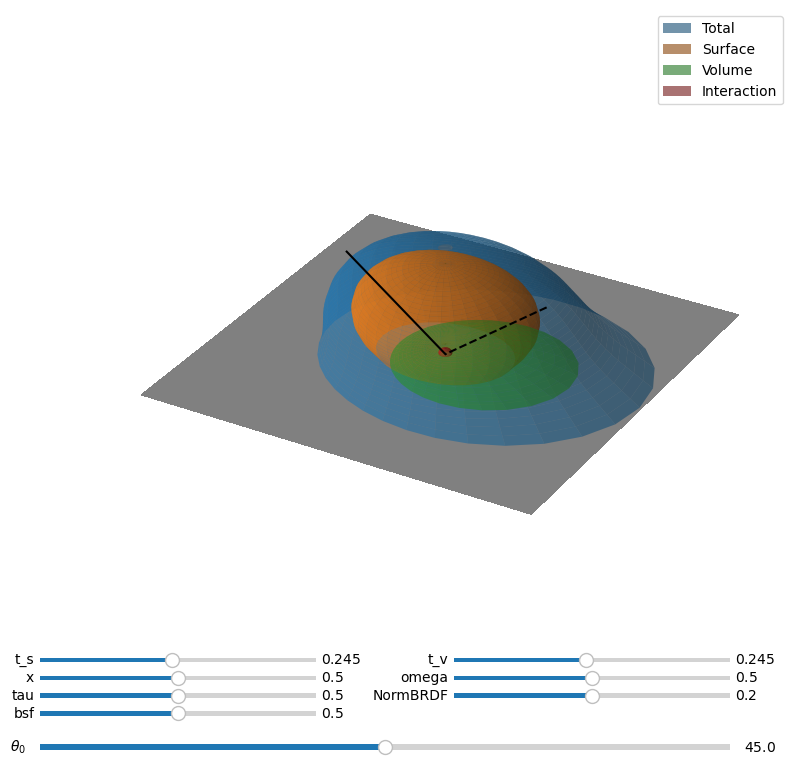

In [7]:
R.dB = False   # Create 3D plots in linear units

param_dict=dict(t_s=(0.01, 0.5),
                t_v=(0.01, 0.5),
                x=(0, 1),
                omega=(0, 1),
                tau=(0, 1),
                NormBRDF=(0, 0.4),
                bsf=(0, 1),
                )

a0 = R.analyze3d(param_dict=param_dict, contributions="tsvi")